# Finding the Best Markets to Advertise

I will try to find proper field to create an E-learning Bootcamp. I will use [freeCodeCamp's 2017 New Coder Survey](https://github.com/freeCodeCamp/2017-new-coder-survey) to see the new coders' interest. 

## Opening Data

In [1]:
import pandas as pd

In [2]:
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)

In [3]:
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
fcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


## Investigating Interests to Jobs

The "JobRoleInterest" column indicate the roles. I will explore this column.

In [5]:
fcc["JobRoleInterest"].unique()

array([nan, 'Full-Stack Web Developer',
       '  Front-End Web Developer, Back-End Web Developer,   DevOps / SysAdmin,   Mobile Developer, Full-Stack Web Developer',
       ...,
       '  Data Scientist, Game Developer,   Quality Assurance Engineer',
       'Back-End Web Developer, Data Engineer,   Data Scientist,   DevOps / SysAdmin',
       '  DevOps / SysAdmin,   Mobile Developer,   Product Manager, Game Developer,   Front-End Web Developer, Data Engineer,   Quality Assurance Engineer,   User Experience Designer, Back-End Web Developer,   Data Scientist, Full-Stack Web Developer, Information Security, IT specialist '],
      dtype=object)

In [6]:
fcc['JobRoleInterest'].value_counts() * 100

Full-Stack Web Developer                                                                                                                                                                                                         82300
  Front-End Web Developer                                                                                                                                                                                                        45000
  Data Scientist                                                                                                                                                                                                                 15200
Back-End Web Developer                                                                                                                                                                                                           14200
  Mobile Developer                                                          

In [7]:
fcc['JobRoleInterest'].value_counts(normalize = True) * 100


Full-Stack Web Developer                                                                                                                                                                                                         11.770595
  Front-End Web Developer                                                                                                                                                                                                         6.435927
  Data Scientist                                                                                                                                                                                                                  2.173913
Back-End Web Developer                                                                                                                                                                                                            2.030892
  Mobile Developer                                          

I will drop the null values from the "JobRoleInterest" column. After that, I will split the multiple jobs and I will use this information to detect number of options for the participants.

In [8]:
interests_no_nulls = fcc['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')


In [9]:
n_of_options = splitted_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

There are people, approximately 32% of participants, who wants to specalize only one field. These people know what they want. The other people don not have a certain decision and they have mixed interests. 

I will check the situation for "Web Developer|Mobile Developer". I will see the rate of interests compared to others.

In [10]:
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer')

In [11]:
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt


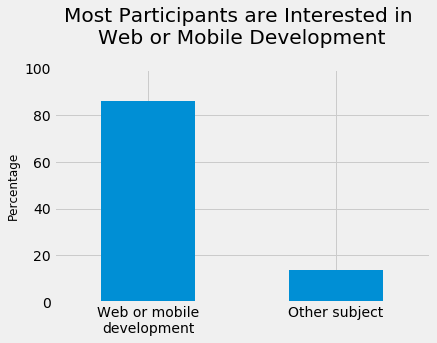

In [13]:
plt.style.use('fivethirtyeight')
freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',y = 1.08) 
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],rotation = 0) 
plt.ylim([0,100])
plt.show()

There is a big trend towards "Web and Mobile Development". 86% of the total roles are "Web and Mobile Development".

## Locations and Densities

I will check the density of new coders according to locations.

In [14]:
fcc_good= fcc[fcc["JobRoleInterest"].notnull()].copy()


absolute_frequencies= fcc_good["CountryLive"].value_counts()
relative_frequencies= fcc_good["CountryLive"].value_counts(normalize= True)*100


pd.DataFrame(data= {"Absolute frequency": absolute_frequencies,
                   "Percentage": relative_frequencies})

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


45.7% of the new coders are in USA. The second country is India, with 7% of new coders.

## Spending Money for Learning

I want to learn how much money a participant spends for their studies.

In [15]:
fcc_good["MonthsProgramming"].replace(0,1, inplace=True)

fcc_good["money_per_month"]= fcc_good["MoneyForLearning"]/ fcc_good["MonthsProgramming"]
fcc_good["money_per_month"].isnull().sum()

675

There are 675 null values. I will use non-null entries for countries amd money columns.

In [16]:
fcc_good= fcc_good[fcc_good["money_per_month"].notnull()]

In [17]:
fcc_good= fcc_good[fcc_good["CountryLive"].notnull()]
fcc_good["CountryLive"].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

I will group countries and see the amount of money for per month for per student. The currency of this data is dollars. 

In [18]:
countries_mean= fcc_good.groupby("CountryLive").mean()
countries_mean["money_per_month"][["United States of America", "India", "United Kingdom", "Canada"]]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The USA has the highest spending.

## Extreme Outliers

I will check the distribution of spending for the first four countries.

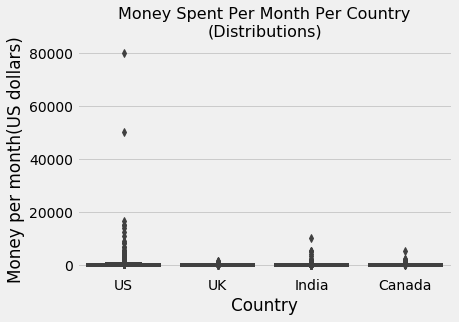

In [19]:
only_4= fcc_good[fcc_good["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")]

import seaborn as sns
sns.boxplot(y= "money_per_month", x="CountryLive", data= only_4)

plt.title("Money Spent Per Month Per Country\n(Distributions)", fontsize=16)
plt.ylabel("Money per month(US dollars)")
plt.xlabel("Country")
plt.xticks(range(4), ["US", "UK", "India", "Canada"])
plt.show()

In USA entries, there are two intresting columns which have spending for studies more than 50,000 dollars. It is like extremly. I will clean data which is more than 20,000 dollars.  

In [20]:
fcc_good= fcc_good[fcc_good["money_per_month"]<20000]

I will create another distribution plot again.

In [21]:
countries_mean= fcc_good.groupby("CountryLive").mean()
countries_mean["money_per_month"][["United States of America", "India", "United Kingdom", "Canada"]]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The amount of spendings did not change for India, United Kingdom and Canada. However, the mean is reduced for USA.

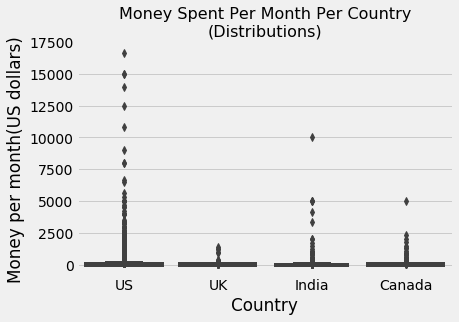

In [22]:
only_4= fcc_good[fcc_good["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")]

sns.boxplot(y="money_per_month", x="CountryLive", data= only_4)

plt.title("Money Spent Per Month Per Country\n(Distributions)", fontsize=16)
plt.ylabel("Money per month(US dollars)")
plt.xlabel("Country")
plt.xticks(range(4), ["US", "UK","India", "Canada"])
plt.show()

There are extreem entries in India spendings. I will drop the spendings which is more than 2,500 dollars.   

In [23]:
india_outliers= only_4[(only_4["CountryLive"]== "India")& (only_4["money_per_month"]>= 2500)]

india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


In [24]:
only_4= only_4.drop(india_outliers.index)

Also, there are a lot of extreem entries in USA spendings.  

In [25]:
us_outliers= only_4[(only_4["CountryLive"]== "United States of America") & (only_4["money_per_month"]>= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


There are 6 students who attended bootcamps and had been programming less than 3 months. I will clean these students' data, because it affects the amount of spending. 

In [26]:
no_bootcamp= only_4[(only_4["CountryLive"]=="United States of America")& (only_4["money_per_month"]>=6000)&(only_4["AttendedBootcamp"]==0)]


only_4= only_4.drop(no_bootcamp.index)


less_than_3_months=only_4[(only_4["CountryLive"]=="United States of America")& (only_4["money_per_month"]>=6000) & (only_4["MonthsProgramming"]<=3)]


only_4= only_4.drop(less_than_3_months.index)

The other extreme entry in Canada. It is more than 4500 dollars. I will clean it.  

In [27]:
canada_outliers= only_4[(only_4["CountryLive"]=="Canada")& (only_4["money_per_month"]>4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [28]:
only_4= only_4.drop(canada_outliers.index)

In [29]:
only_4.groupby("CountryLive").mean()["money_per_month"]

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

Above, I obtained the last version of the spendings. I will create the last distribution plot, below.

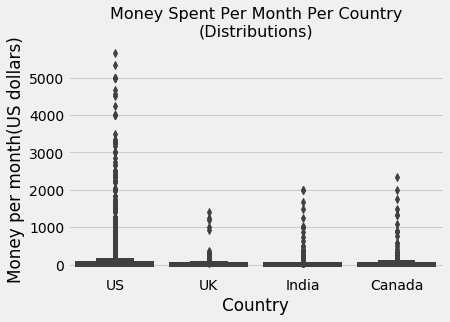

In [30]:
sns.boxplot(y= "money_per_month", x="CountryLive", data=only_4)

plt.title("Money Spent Per Month Per Country\n(Distributions)", fontsize=16)
plt.ylabel("Money per month(US dollars)")
plt.xlabel("Country")
plt.xticks(range(4), ["US", "UK", "India", "Canada"])
plt.show()

I can use this distribution table to decide the price of new e-learning bootcamp.

## The Best Advertise Markets

In [31]:
only_4["CountryLive"].value_counts(normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

## Conclusion

I advise especially the USA to create advertisement. Because, there is highest potential to spend money for online bootcamp. Also, the India has high demand to study. The advertising budget can divide and use for these two countries. Most of the budget must invest to the USA. Additionally, the United Kingdom and the Canada can be evaluated for advertising investments for online bootcamp.
<br>
Most of the participants intend to learn "Web or Mobile Development". 